In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from dhdrnet.util import  ROOT_DIR

/home/smsx/src/DHDRNet/.venv/lib/python3.8/site-packages/colour/utilities/verbose.py:235: ColourWarning: "Adobe DNG Converter" is not available on your platform!
  warn(*args, **kwargs)


In [2]:
ev_baseline_df = pd.read_csv(ROOT_DIR / "fusion_records.csv")
ev_baseline_df.head()

,name,mse_-3.5,ssim_-3.5,ms_ssim_-3.5,mse_3.5,ssim_3.5,ms_ssim_3.5,mse_7.0,ssim_7.0,ms_ssim_7.0,...,ms_ssim_5.0,mse_-5.0,ssim_-5.0,ms_ssim_-5.0,mse_-2.5,ssim_-2.5,ms_ssim_-2.5,mse_2.5,ssim_2.5,ms_ssim_2.5
0,0127_20161018_111029_303,0.000104,0.999999,0.999998,0.000080,1.000000,0.999999,0.000080,1.000000,0.999999,...,0.999999,0.000080,1.000000,0.999999,0.000130,0.999999,0.999998,0.000079,1.000000,0.999999
1,6G7M_20150321_124944_821,0.002730,0.999606,0.999947,0.002508,0.999628,0.999951,0.002496,0.999623,0.999951,...,0.999951,0.003075,0.999576,0.999941,0.002035,0.999703,0.999963,0.002556,0.999625,0.999950
2,0037_20160717_132116_222,0.000447,0.999979,0.999989,0.000433,0.999983,0.999989,0.000433,0.999983,0.999989,...,0.999990,0.000426,0.999980,0.999989,0.000557,0.999975,0.999990,0.000433,0.999982,0.999989
3,33TJ_20150820_180403_156,0.001023,0.999895,0.999982,0.001108,0.999877,0.999982,0.001130,0.999870,0.999982,...,0.999982,0.001123,0.999869,0.999982,0.001028,0.999904,0.999981,0.001059,0.999885,0.999982
4,33TJ_20150613_094235_247,0.000132,0.999998,0.999998,0.000160,0.999997,0.999997,0.000136,0.999998,0.999997,...,0.999997,0.000125,0.999998,0.999998,0.000132,0.999998,0.999998,0.000175,0.999998,0.999997


In [3]:
ev_categories = {ev_max:np.linspace(-ev_max,ev_max,5) for ev_max in range(4,8)}
ev_categories

{4: array([-4., -2.,  0.,  2.,  4.]),
 5: array([-5. , -2.5,  0. ,  2.5,  5. ]),
 6: array([-6., -3.,  0.,  3.,  6.]),
 7: array([-7. , -3.5,  0. ,  3.5,  7. ])}

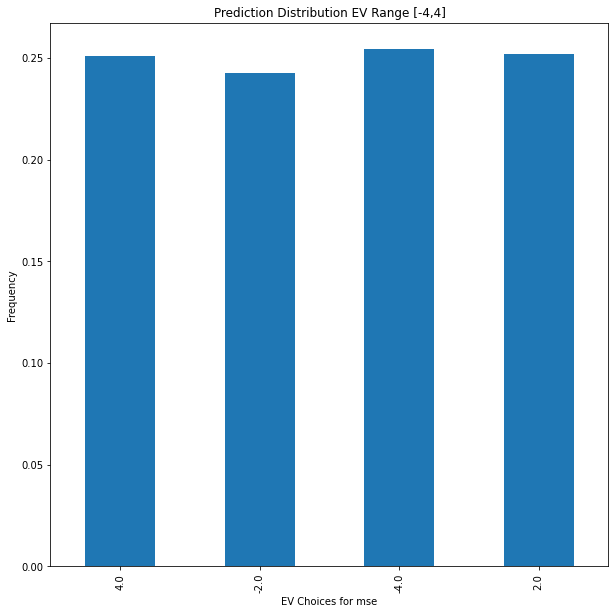

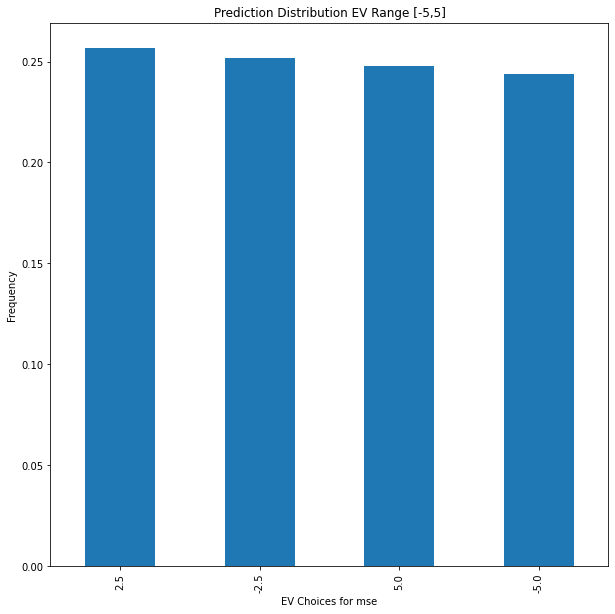

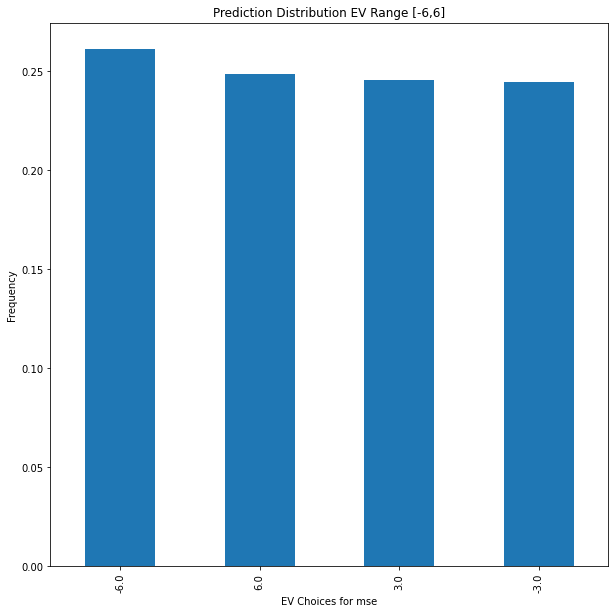

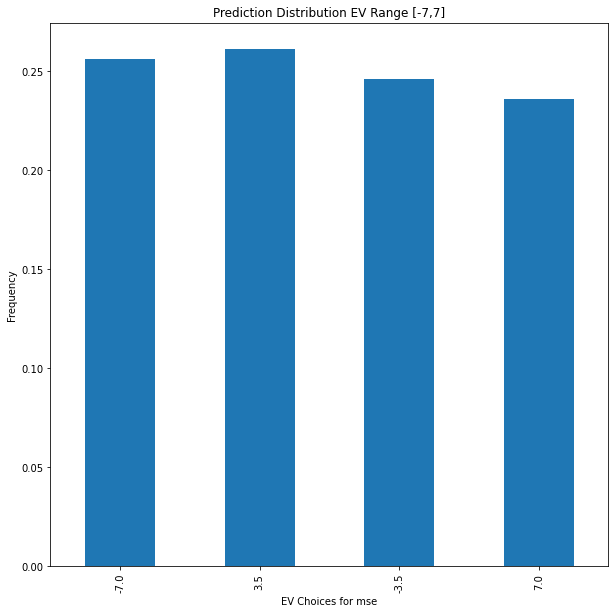

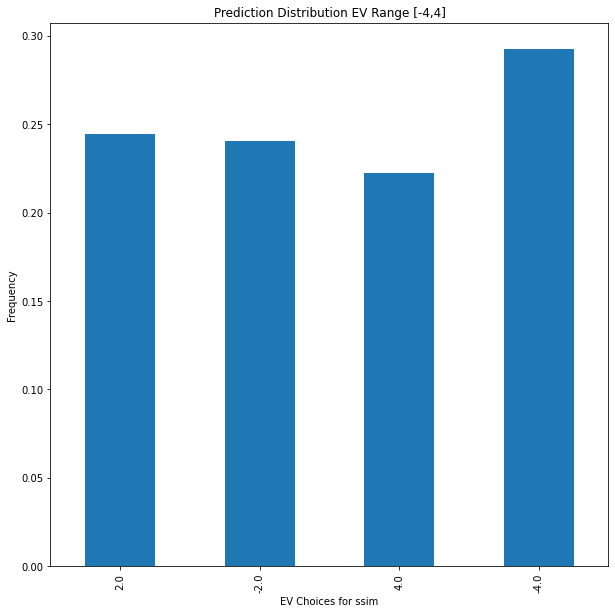

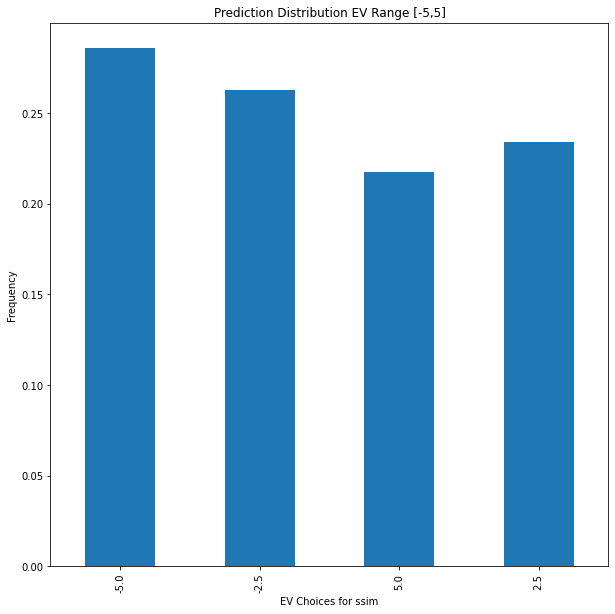

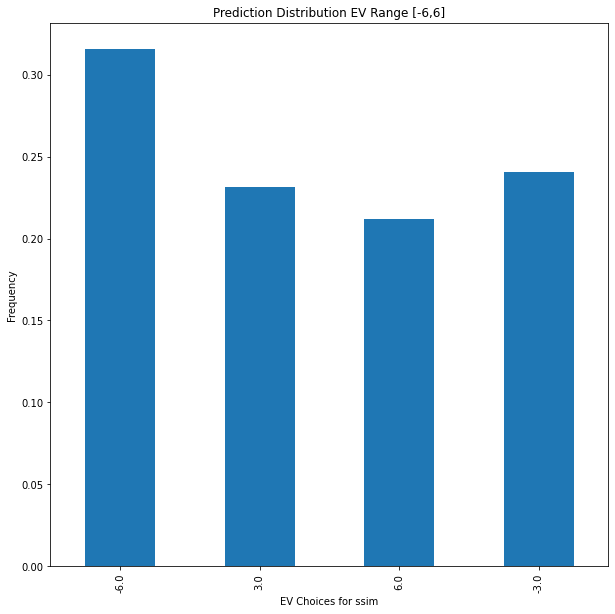

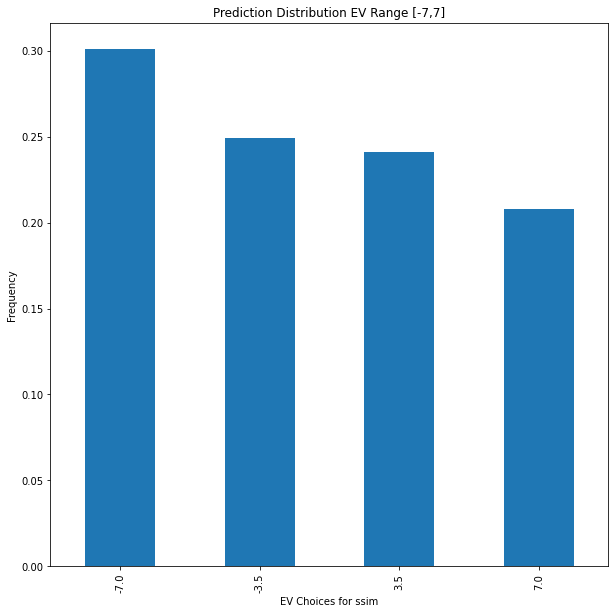

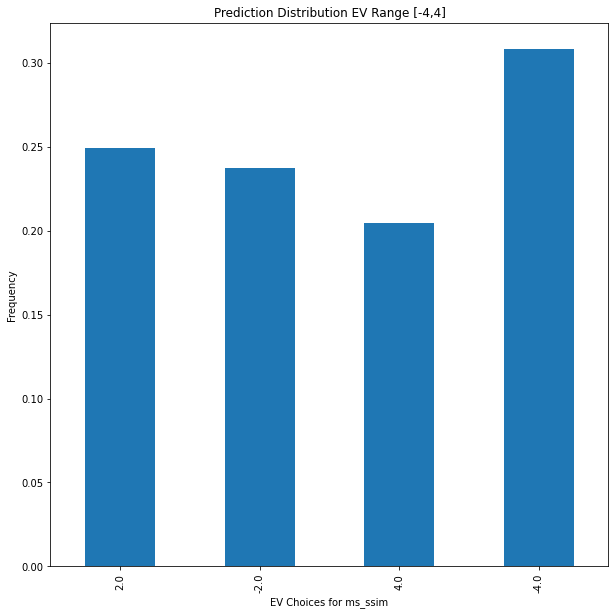

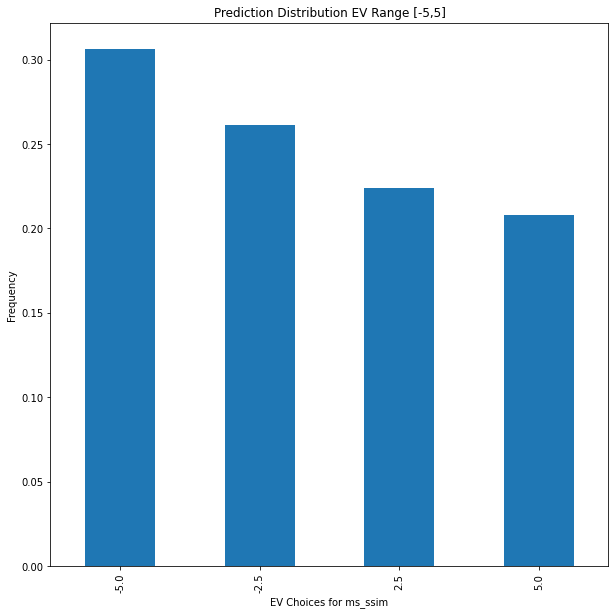

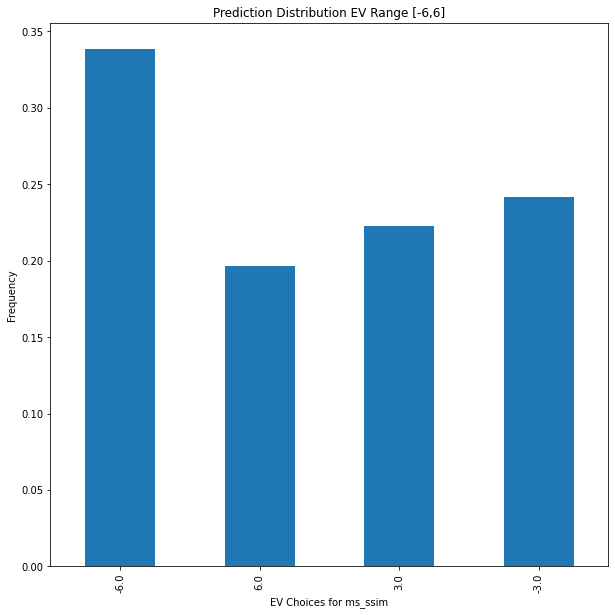

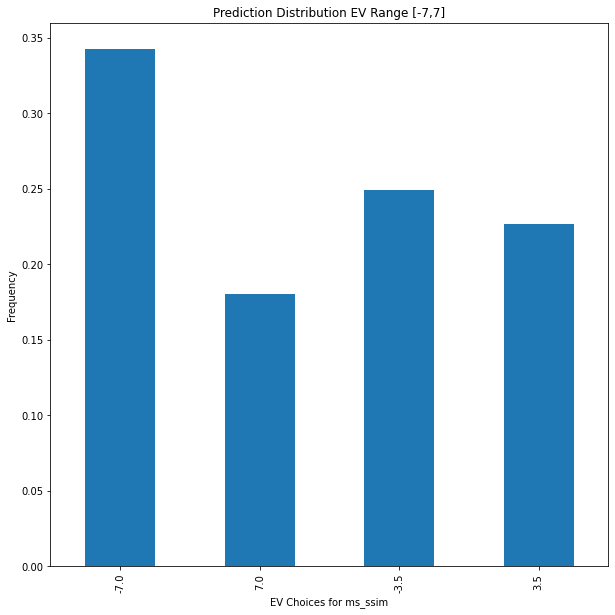

In [4]:
from dhdrnet.vis_util import get_pred_dist

for type in ["mse", "ssim", "ms_ssim"]:
    get_pred_dist(ev_baseline_df, ev_categories, type, save_plots=True)

In [5]:
def parse_range(name):
    parts = name.split("[",)[1:]
    asnums = sorted(tuple(float(part[:-1]) for part in parts))
    return asnums

In [6]:
optdf = pd.read_csv(ROOT_DIR / "opt_pairs_new.csv")
optdf = optdf.set_index("name")
optdf

,mse_[-4.0][-2.0],mse_[-4.0][0.0],mse_[-4.0][2.0],mse_[-4.0][4.0],mse_[-2.0][0.0],mse_[-2.0][2.0],mse_[-2.0][4.0],mse_[0.0][2.0],mse_[0.0][4.0],mse_[2.0][4.0],...,ms_ssim_[-7.0][-3.5],ms_ssim_[-7.0][0.0],ms_ssim_[-7.0][3.5],ms_ssim_[-7.0][7.0],ms_ssim_[-3.5][0.0],ms_ssim_[-3.5][3.5],ms_ssim_[-3.5][7.0],ms_ssim_[0.0][3.5],ms_ssim_[0.0][7.0],ms_ssim_[3.5][7.0]
name,,,,,,,,,,,,,,,,,,,,,
0127_20161018_111029_303,0.090015,0.089465,0.087303,0.078923,0.089494,0.087313,0.078925,0.087428,0.078962,0.079402,...,0.998652,0.998662,0.998773,0.999690,0.998662,0.998773,0.999690,0.998772,0.999690,0.999685
6G7M_20150321_124944_821,0.391223,0.388934,0.379865,0.344185,0.388940,0.379808,0.344115,0.379857,0.343933,0.344257,...,0.992846,0.992898,0.993472,0.998343,0.992898,0.993473,0.998343,0.993476,0.998346,0.998354
0037_20160717_132116_222,0.141433,0.140565,0.137135,0.123769,0.140602,0.137146,0.123771,0.137313,0.123821,0.124479,...,0.996192,0.996221,0.996538,0.999161,0.996221,0.996538,0.999161,0.996536,0.999161,0.999147
33TJ_20150820_180403_156,0.176385,0.175287,0.170921,0.153922,0.175334,0.170934,0.153923,0.171136,0.153980,0.154793,...,0.996899,0.996923,0.997185,0.999339,0.996922,0.997185,0.999339,0.997184,0.999339,0.999326
33TJ_20150613_094235_247,0.088427,0.087887,0.085761,0.077496,0.087913,0.085769,0.077497,0.085874,0.077528,0.077939,...,0.998398,0.998410,0.998541,0.999636,0.998410,0.998541,0.999636,0.998540,0.999636,0.999630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0039_20141010_073849_587,0.192254,0.191081,0.186399,0.168144,0.191119,0.186403,0.168137,0.186577,0.168164,0.168880,...,0.996099,0.996128,0.996455,0.999150,0.996128,0.996455,0.999150,0.996454,0.999151,0.999141
0009_20160703_170423_902,0.225976,0.224599,0.219159,0.198037,0.224657,0.219176,0.198037,0.219433,0.198105,0.199103,...,0.996058,0.996088,0.996413,0.999109,0.996088,0.996413,0.999109,0.996411,0.999109,0.999096
0037_20160717_131556_105,0.163726,0.162729,0.158809,0.143613,0.162780,0.158826,0.143617,0.159032,0.143682,0.144470,...,0.997543,0.997561,0.997762,0.999432,0.997561,0.997762,0.999432,0.997761,0.999432,0.999424


In [7]:
ev_maximums = list(range(4,8))
ev_maximums


[4, 5, 6, 7]

In [8]:
from collections import defaultdict
# groups = defaultdict(list)
groups = {}
mse_groups = {}
ssim_groups = {}
for ev_max in ev_maximums:
    for ev_pair, colname in zip(map(parse_range, optdf.columns),optdf.columns):
        if all(ev in ev_categories[ev_max] for ev in ev_pair):
            metric = "_".join(colname.split("_")[:-1])
#             groups[colname] = f"{metric}_ev_{ev_max}"
            if metric == "mse":
                mse_groups[colname] = ev_max
            if "ssim" in metric:
                ssim_groups[colname] = f"{metric}_ev_{ev_max}"

# grouped = optdf.groupby(groups, axis=1)
opt_mse = optdf.groupby(mse_groups,axis=1)
opt_ssim = optdf.groupby(ssim_groups,axis=1)

In [9]:
opt_choice_mse = opt_mse.idxmin(axis=1).applymap(parse_range)
opt_choice_ssim = opt_ssim.idxmax(axis=1).applymap(parse_range)

In [10]:
opt_choice_mse

,4.0,5.0,6.0,7.0
name,,,,
0127_20161018_111029_303,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]"
6G7M_20150321_124944_821,"[0.0, 4.0]","[0.0, 5.0]","[3.0, 6.0]","[3.5, 7.0]"
0037_20160717_132116_222,"[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[-3.5, 7.0]"
33TJ_20150820_180403_156,"[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[0.0, 7.0]"
33TJ_20150613_094235_247,"[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[-3.5, 7.0]"
...,...,...,...,...
0039_20141010_073849_587,"[-2.0, 4.0]","[0.0, 5.0]","[0.0, 6.0]","[0.0, 7.0]"
0009_20160703_170423_902,"[-4.0, 4.0]","[-2.5, 5.0]","[0.0, 6.0]","[0.0, 7.0]"
0037_20160717_131556_105,"[-4.0, 4.0]","[-5.0, 5.0]","[-3.0, 6.0]","[-3.5, 7.0]"


In [11]:
opt_choice_ssim

,ms_ssim_ev_4,ms_ssim_ev_5,ms_ssim_ev_6,ms_ssim_ev_7,ssim_ev_4,ssim_ev_5,ssim_ev_6,ssim_ev_7
name,,,,,,,,
0127_20161018_111029_303,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]","[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]"
6G7M_20150321_124944_821,"[0.0, 4.0]","[0.0, 5.0]","[3.0, 6.0]","[3.5, 7.0]","[0.0, 4.0]","[2.5, 5.0]","[3.0, 6.0]","[3.5, 7.0]"
0037_20160717_132116_222,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]","[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[-7.0, 7.0]"
33TJ_20150820_180403_156,"[-4.0, 4.0]","[-5.0, 5.0]","[-3.0, 6.0]","[0.0, 7.0]","[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[0.0, 7.0]"
33TJ_20150613_094235_247,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]","[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]"
...,...,...,...,...,...,...,...,...
0039_20141010_073849_587,"[-2.0, 4.0]","[0.0, 5.0]","[0.0, 6.0]","[0.0, 7.0]","[-2.0, 4.0]","[0.0, 5.0]","[0.0, 6.0]","[0.0, 7.0]"
0009_20160703_170423_902,"[-4.0, 4.0]","[-2.5, 5.0]","[-6.0, 6.0]","[0.0, 7.0]","[-4.0, 4.0]","[-2.5, 5.0]","[0.0, 6.0]","[0.0, 7.0]"
0037_20160717_131556_105,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]","[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]"


<ipython-input-12-7d1828e93047>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


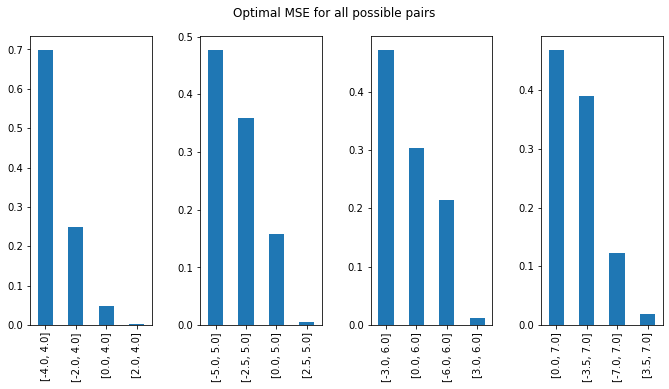

In [12]:
fig, ax = plt.subplots(1,len(opt_choice_mse.columns), sharey=False)
fig.tight_layout()
for i, feat in enumerate(opt_choice_mse):
    opt_choice_mse[feat].value_counts(normalize=True).plot(
        kind='bar',
        ax=ax[i],
        figsize=(10,5)
    )
fig.suptitle("Optimal MSE for all possible pairs")
plt.subplots_adjust(top=0.9, wspace=0.4)
plt.savefig("mse_optimal")
fig.show()
    
                                        

<ipython-input-13-52e1fe11460b>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


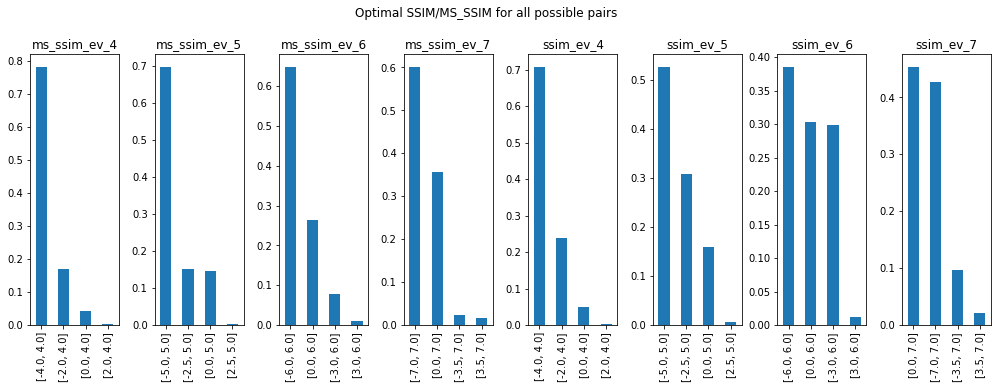

In [13]:
fig, ax = plt.subplots(1,len(opt_choice_ssim.columns), sharey=False)
fig.tight_layout()
for i, feat in enumerate(opt_choice_ssim):
    opt_choice_ssim[feat].value_counts(normalize=True).plot(
        kind='bar',
        ax=ax[i],
        figsize=(15,5),
        title=feat
    )
fig.suptitle("Optimal SSIM/MS_SSIM for all possible pairs")
plt.subplots_adjust(top=0.85,
                   wspace=0.4)
plt.savefig("ms_ssim_optimal")
fig.show()